# ENTREGABLE 2

# INSTRUCCIONES

Realizar la segunda fase del análisis exploratorio usando el archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

# Problema

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

# El set de datos después de la limpieza

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
ruta = "/gdrive/MyDrive/EDEM/MachineLearning/Clasificacion/dataset_banco_clean.csv"
data = pd.read_csv(ruta)

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


# Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor potencial de conversión?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

Para cada una de ellas generar un pequeño resumen

Para poder realizar este pequeño resumen de los datos, se va a emplear una herramienta muy eficiente para la realización de análisis exploratorio de los datos. Esta herramienta es **Sweetviz**:

Para ello se instalarán las dependencias pertinentes, así como se realizarán los imports.

In [4]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.3 MB/s eta 0:00:00


In [5]:
import sweetviz as sv

In [6]:
archivo_csv = '/gdrive/MyDrive/EDEM/MachineLearning/Clasificacion/dataset_banco_clean.csv'
# Intenta con cp1252
try:
    df = pd.read_csv(archivo_csv, encoding='cp1252')
    print(df.head())
except UnicodeDecodeError:
    # Si cp1252 falla, intenta con ISO-8859-1
    df = pd.read_csv(archivo_csv, encoding='ISO-8859-1')
    print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no   2143.0     yes   no   
1   44    technician   single  secondary      no     29.0     yes   no   
2   33  entrepreneur  married  secondary      no      2.0     yes  yes   
3   47   blue-collar  married    unknown      no   1506.0     yes   no   
4   33       unknown   single    unknown      no      1.0      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may     261.0         1   -1.0         0  unknown  no  
1  unknown    5   may     151.0         1   -1.0         0  unknown  no  
2  unknown    5   may      76.0         1   -1.0         0  unknown  no  
3  unknown    5   may      92.0         1   -1.0         0  unknown  no  
4  unknown    5   may     198.0         1   -1.0         0  unknown  no  


A continuación, la herramienta va a realizar un análisis sobre los datos que contiene el archivo .csv que se ha facilitado y mostrará tanto gráficas como ratios. Todo ello lo encapsula en un archivo .html ejecutable.

In [7]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Análisis de cada variable (individual)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


In [9]:
var_num = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

var_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

A continuación, se dibujarán los distintos histogramas para poder realizar el analisis de cada una de las variables categóricas.

<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)
<ipython-input-10-1e4c44461f8d>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(a

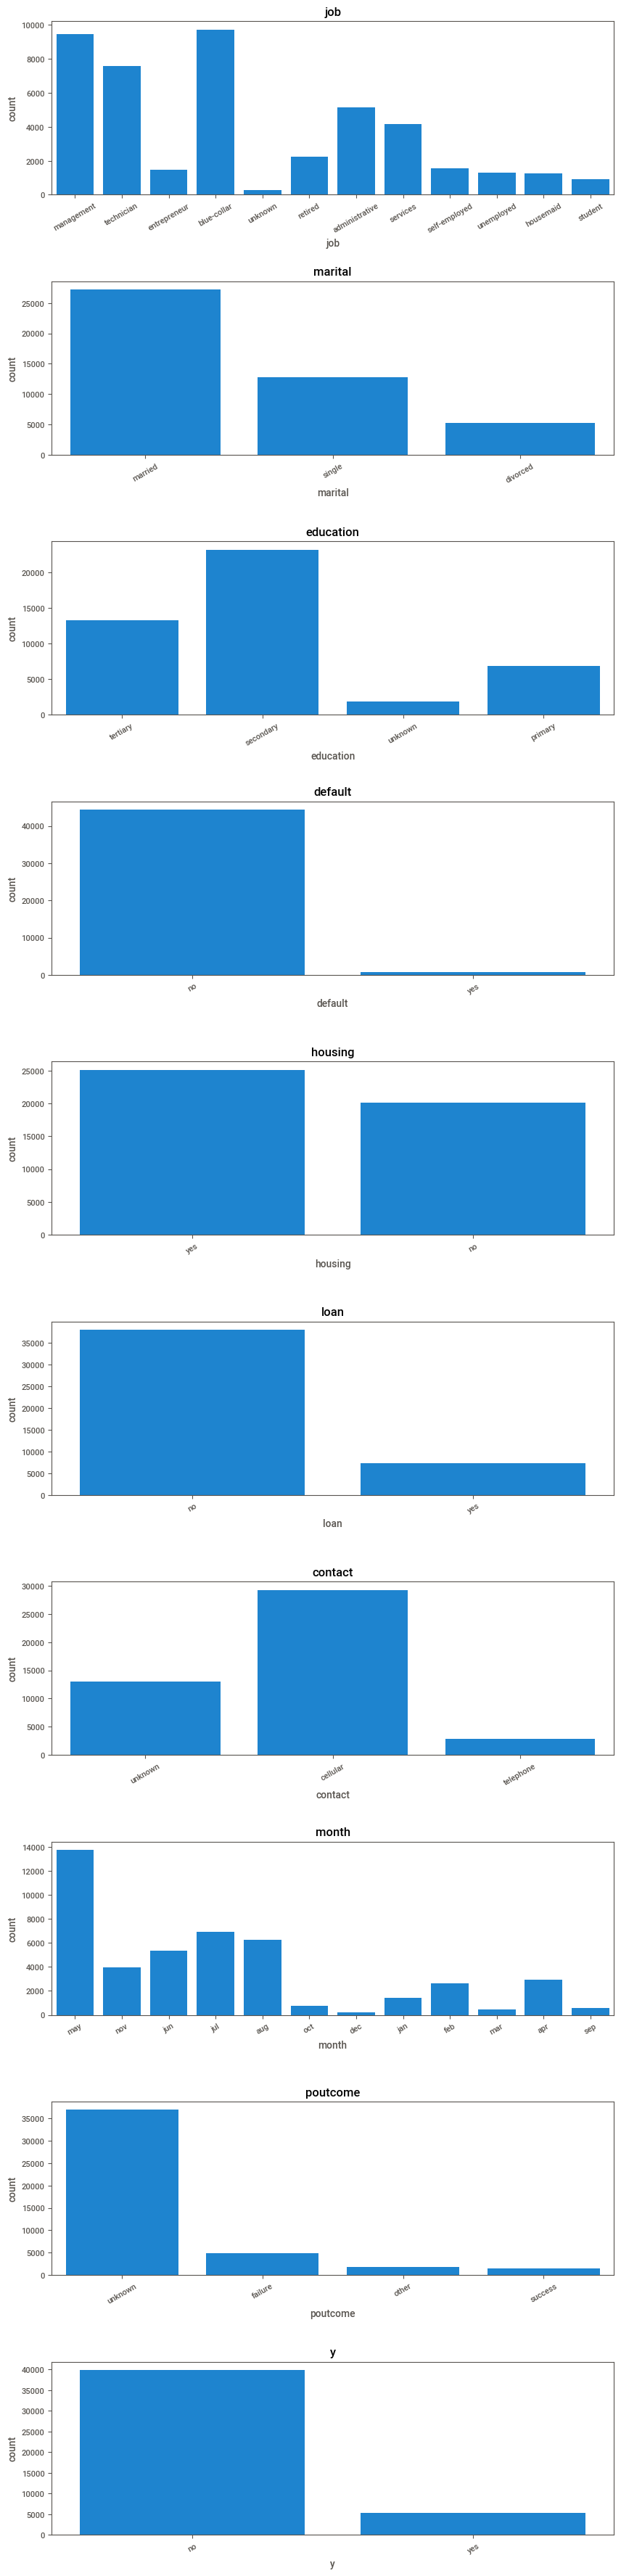

In [10]:
fig, ax = plt.subplots(nrows = len(var_cat), ncols = 1, figsize = (10, 45))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(var_cat):
  sns.countplot(x = col, data = data, ax = ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation = 30)

En lo que respecta a los gráficos que anteriormente se han realizado se pueden concluir que:
- Categoría **job**: Se pueden ver que existen 12 tipos de trabajo. La mayoría de personas a las que fue dirigida la campaña se encontraban en puestos más operativos (blue-collar), managers y también personas administrativas o que se dedican a dar servicios.
- Categoría **maritial**: El estado civil de la mayoría de las personas era casada, seguido de solteros y por último, divorciados.
- Categoría **education**: En su gran mayoría, las personas se encontraban con la enseñanza secundaria adquirida. Unos pocos menos habían llegado hasta la educación terciaria (se entenderá como universitaria/master) mientras que la minoría se repartían en la educación primaria y en educación de la que no se ha obtenido información.
- Categoría **default**: En este caso, la mayoría de las personas reportan valores 'No', es decir, que no han dejado de pagar las deudas que tienen.
- Categoría **housing**: Entre las personas a las que se le dirigió la campaña, cabe destacar que existe una gran equidad entre los que tienen un crédito hipotecario y los que no. Siendo ligeramente superior aquellos que sí lo tienen.
- Categoría **loan**: La gran mayoría no dispone de créditos de consumo.
- Categoría **poutcome**: No se ha podido obtener un buen resultado de las campañas puesto que en la mayoría de los casos no se conoce (unknown) si las personas aceptaron la campaña o no.
- Categoría **y**: La gran mayoría de persoas no aceptaron la oferta.

Como alguna de las variables anteriores, no resulta relevante para el análisis de los datos de cliente, se procederá al borrado de columnas.

In [11]:
# Borrado de columnas irrelevantes.
data.drop(columns = ['contact', 'month', 'day', 'duration', 'campaign', 'pdays', 'previous'], inplace = True)
# Comprobación de que las columnas han sido eliminadas.
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

A continuación se va a realizar un simple análisis de las variables numéricas que existen en el dataset.

In [12]:
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


Se muestran estos gráficos para ver cómo se comportan:

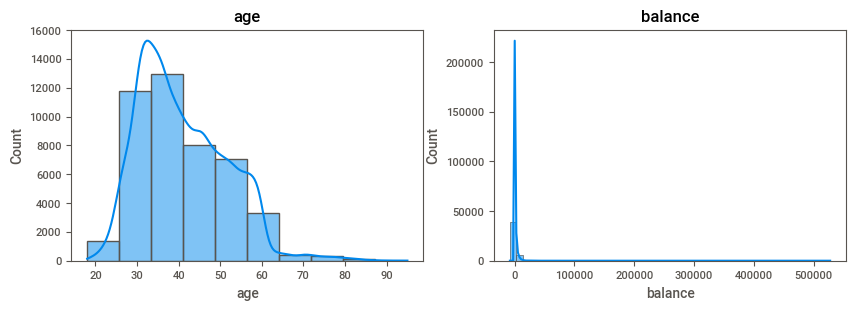

In [13]:
var_num = ['age', 'balance']

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 3))
fig.subplots_adjust(hspace = 0.5)

for i, col in enumerate(var_num):
  if col == 'age':
    nbins = 10
  else:
    nbins = 50
  sns.histplot(x = col, data = data, ax = ax[i], bins = nbins, kde = True)
  ax[i].set_title(col)

Haciendo referencia a lo que se encuentra tanto en la fórmula de .describe() y los gráficos dibujados:

En lo que respecta a **edad**:
- La media del dataset proporcionado se encuentra entorno a los 41 años de edad.
- El mínimo de edad observada son 18 años mientras que el máximo se sitúa en los 95.
- La gran mayoría de las personas observadas se encuentran en los 48 años de edad (75% de la muestra).

Por otra parte, en lo que respecta al **balance** en cuenta:
- La media de balance en cuenta está entorno a los 1400€.
- Existen personas que se encuentran actualmente en un saldo negativo (mínimo de -8000€).
- La gran mayoría (75% de la muestra) se sitúa muy cerca de la media con 1500€ de balance aproximadamaente.

## Análsis Univariado.

El análisis univariado lo que permite es comprobar si existe relación entre alguna de las posibles variables predictoras que serán utilizadas en el modelo y la variable a predecir ('y') que en este caso sería si el cliente finalmente aceptó la oferta.

In [14]:
# Transformar la variable predictora 'y' en binario (1 = 'yes', 0 = 'no')

diccionario = {'yes': 1, 'no': 0}
binario = data['y'].map(diccionario)
data['y_bin'] = binario

<ipython-input-15-077c0c2ca776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplt = sns.boxplot(x='y_bin', y=col, data=data, ax=ax[i], palette=['skyblue', 'salmon'])
<ipython-input-15-077c0c2ca776>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bplt = sns.boxplot(x='y_bin', y=col, data=data, ax=ax[i], palette=['skyblue', 'salmon'])


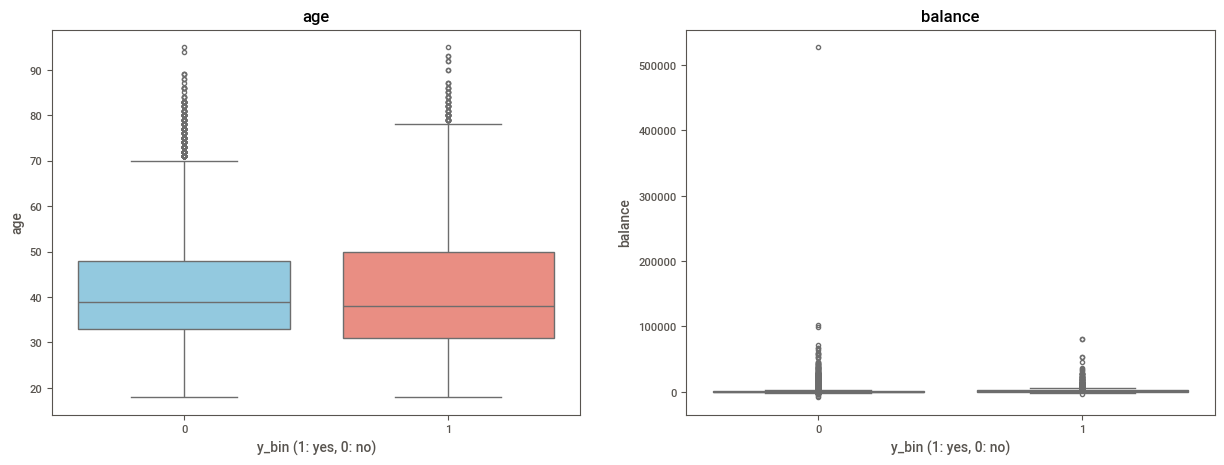

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(var_num):
    bplt = sns.boxplot(x='y_bin', y=col, data=data, ax=ax[i], palette=['skyblue', 'salmon'])
    ax[i].set_xlabel('y_bin (1: yes, 0: no)')
    ax[i].set_title(col)

plt.show()

Teniendo en cuenta las variables numéricas escogidas ('**edad**' y '**balance**) se puede observar que:

En términos de **edad** no se observa una gran diferencia entre aquellos que escogieron el producto, así como los que prefirieron rechazarlo. Ambos grupos se encuentran en una media de 40 años de edad aproximadamente.

Por otra parte, mirando el **balance**, destacar que se encuentran en la misma situación que con la variable edad. No hay una distinción significativa entre los grupos que optaron por escoger el producto y los que no.

A continuación se van a estudiar las tasas de conversión a lo largo del rango de edades que existen dentro del dataset.

In [16]:
def tasa_conversion(var_predictora, var_predecir, type = 'line', order = None):
  x, y = var_predictora, var_predecir

  grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conv').reset_index()

  if type == 'line':
    plt.figure(figsize = (10, 6))
    sns.lineplot(x = var_predictora, y = 'tasa_conv', data = grupo)
    plt.grid()
  elif type == 'bar':
    plt.figure(figsize = (14, 6))
    sns.barplot(x = var_predictora, y = 'tasa_conv', data = grupo, order = order)
    plt.grid()
  elif type == 'scatter':
    plt.figure(figsize = (14, 6))
    sns.scatterplot(x = var_predictora, y = 'tasa_conv', data = grupo)
    plt.grid()


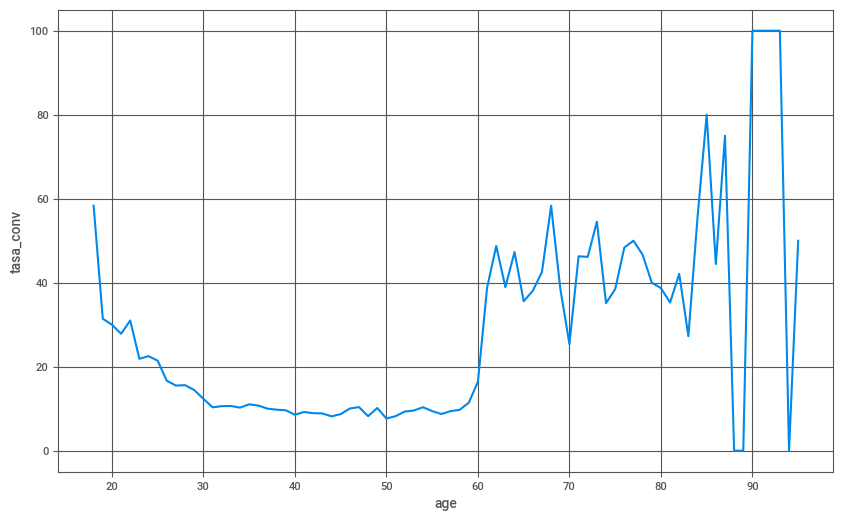

In [17]:
# Representación de los datos
tasa_conversion('age', 'y_bin')

Una vez vista la gráfica anterior, sí que se pueden ver diferencias en las tasas de conversión por rangos de edad. Los más jóvenes (18-25 años) tienen una tasa entorno al 20%, es decir, de cada 100 personas, sólo 20 lo adquirieron. Por otra parte de los 26 a los 59 años, la tendencia se encuentra por debajo del 20% y, por último, la edad que comprende de los 60 en adelante, las tasas comienzan a ser superiores.

Para poder proseguir con el estudio, se agruparán en 3 grupos de edad para poder estudiar mejor las tasas de conversión de cada uno.

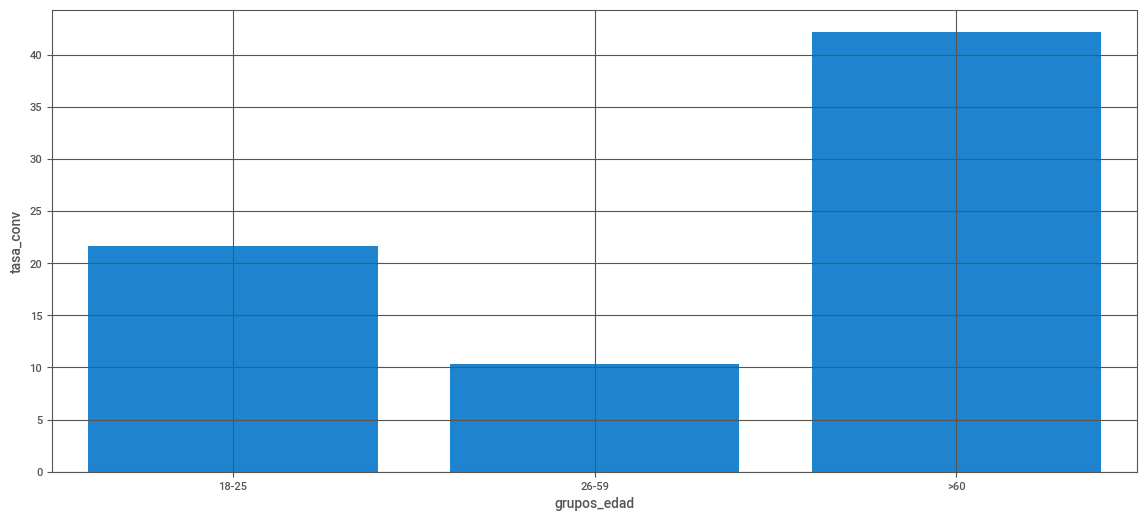

In [18]:
# Se asignan los grupos de edad para poder hacer el análisis.
# Genera el grupo de edad "18-25 años"
data.loc[:,'grupos_edad'] = "18-25"
# Genera el grupo de edad "Mayores de 60 años"
data.loc[data['age']>60,'grupos_edad'] = ">60"
# Genera el grupo de edad "Edades entre los 26 y 60 años"
data.loc[(data['age']>25)&(data['age']<=59),'grupos_edad'] = "26-59"

tasa_conversion('grupos_edad','y_bin',type='bar')

Observando la gráfica anterior, se puede concluir que:
- El grupo de jóvenes tienen una tasa de conversión cercana al 21%.
- El grupo de edad media baja su tasa de conversión hasta el 10% aproximadamente
- Quienes tienen una tasa de conversión superior al resto, es el grupo de personas mayores a 60 años.

A continuación, se realizará el mismo proceso pero con la variable 'balance'

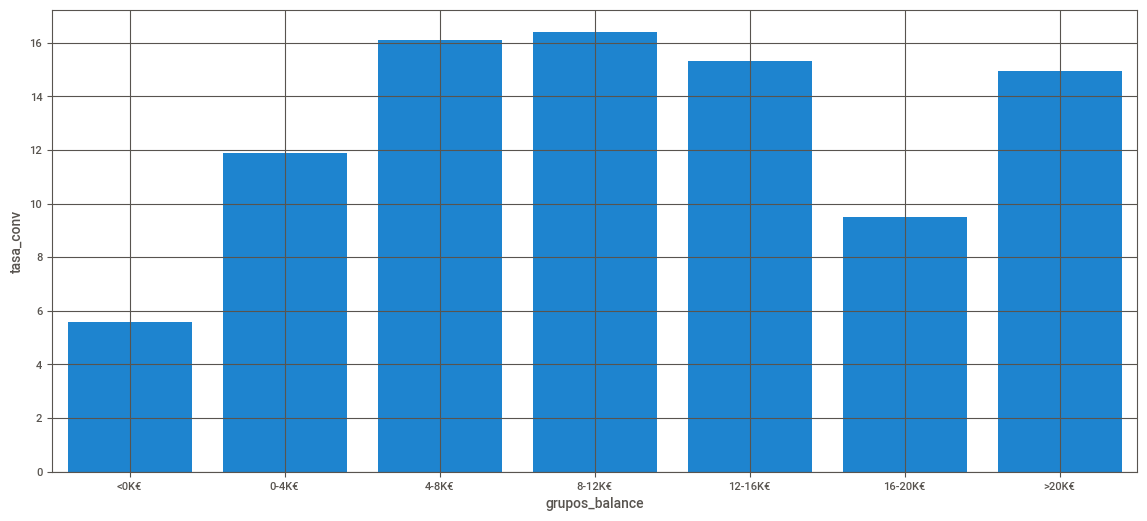

In [19]:
# Se asignan los grupos de balance para poder hacer el análisis.
# Genera el grupo de balance "<0 €"
data.loc[:,'grupos_balance'] = "<0K€"
# Genera el grupo de balance "0-4K€"
data.loc[(data['balance']>=0)&(data['balance']<4000),'grupos_balance'] = "0-4K€"
# Genera el grupo de balance "4-8K€"
data.loc[(data['balance']>=4000)&(data['balance']<8000),'grupos_balance'] = "4-8K€"
# Genera el grupo de balance "8-12K€"
data.loc[(data['balance']>=8000)&(data['balance']<12000),'grupos_balance'] = "8-12K€"
# Genera el grupo de balance "12-16K€"
data.loc[(data['balance']>=12000)&(data['balance']<16000),'grupos_balance'] = "12-16K€"
# Genera el grupo de balance "16-20K€"
data.loc[(data['balance']>=16000)&(data['balance']<20000),'grupos_balance'] = "16-20K€"
# Genera el grupo de balance ">20K€"
data.loc[data['balance']>20000,'grupos_balance'] = ">20K€"

order = ["<0K€","0-4K€","4-8K€","8-12K€","12-16K€","16-20K€",">20K€"]
tasa_conversion('grupos_balance','y_bin',type='bar',order=order)

De la gráfica anterior se puede extraer que:
- Los que menor tasa de conversión tienen son aquellos cuyo saldo de balance es negativo (6% de conversión). Esto es debido a que probablemente no tengan el suficiente dinero para invertir y no quieran endeudarse más.
- Los grupos que más balance tienen (a priori, lógico) son aquellos que tienen una mayor tasa de conversión, exceptiando el grupo de 16-20K€. El resto se encuentra entorno al 16% de la misma. Tienen mayor posibilidad de inversión y es por ello que se decanten por aceptar el producto.


En el siguiente apartado, se realizará el mismo análisis que se ha llevado a cabo hasta ahora, pero esta vez se van a escoger las diferentes **variables categóricas**

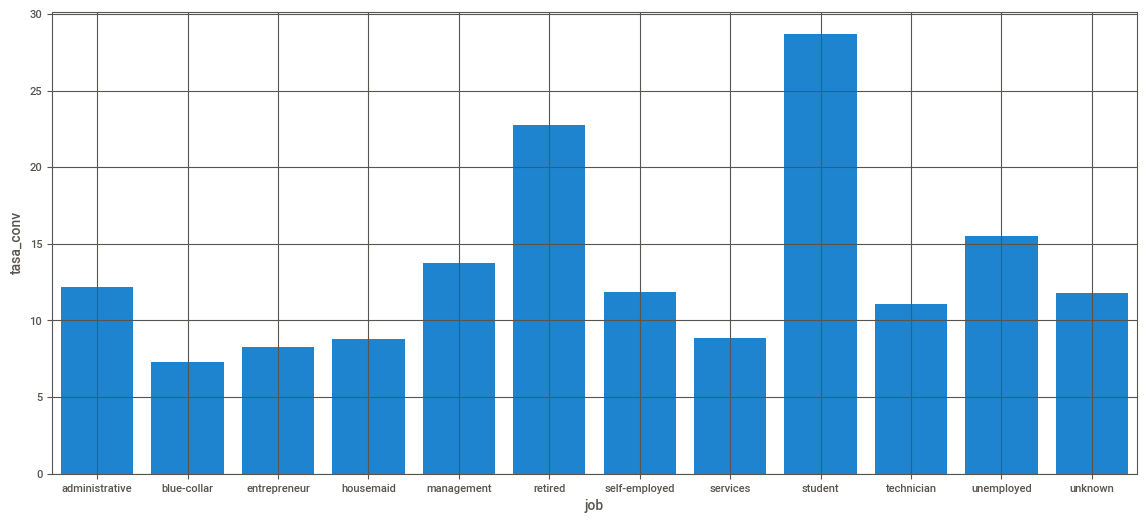

In [20]:
tasa_conversion('job','y_bin',type='bar')

Tras la observación de la gráfica anterior, se puede concluir que los potenciales clientes podrían encontrarse en:
- Personas que ya se han jubilado y los estudiantes. Son quienes concentran la mayor tasa de conversión de las personas estudiadas (23% y 28% aproximadamente)
- El resto de los trabajos se encuentran más o menos en una tasa de conversión entre el 10% y 15% respectivamente.

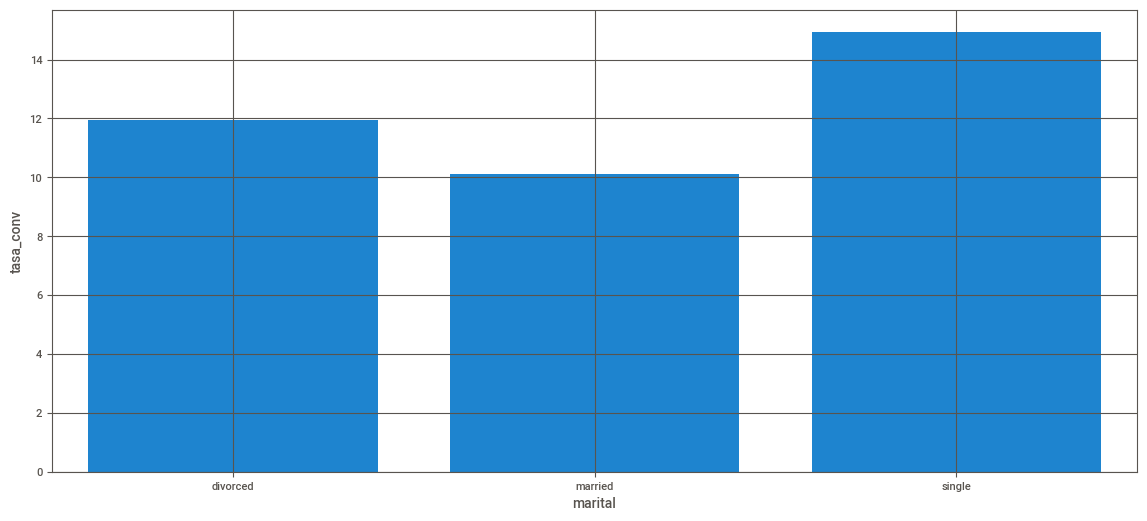

In [21]:
tasa_conversion('marital','y_bin',type='bar')

Respecto a la gráfica del estado civil y tasa de conversión de los mismos, destacar que los tres grupos tienen una tasa de conversión similar, superior al 10% pero inferior al 15%, pero no son diferenciales, es decir, el estado civil de la persona no influye en las tasas de conversión de las personas.

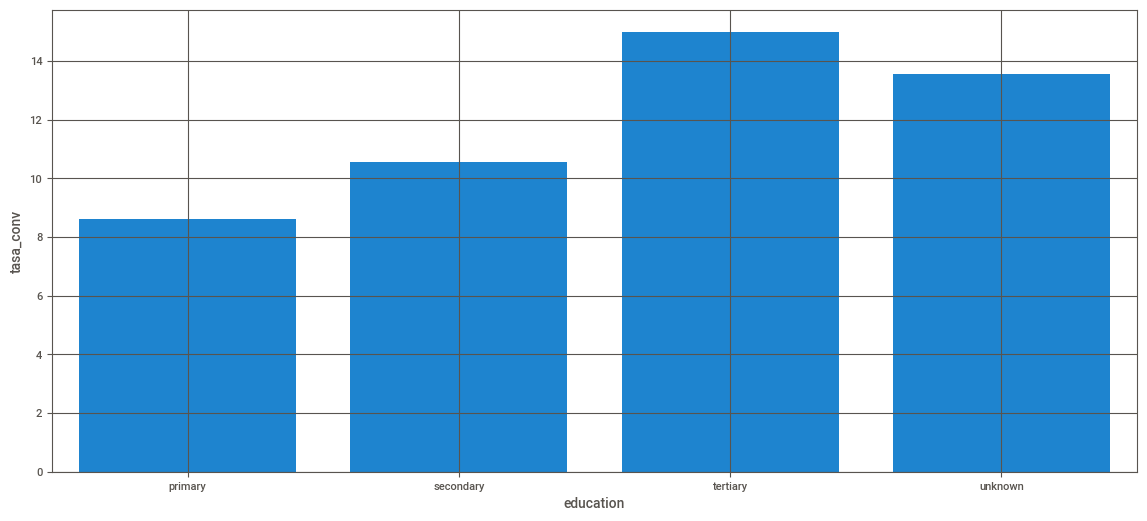

In [22]:
tasa_conversion('education','y_bin',type='bar')

A continuación y siguiendo el gráfico del nivel educativo y tasa de conversión de las personas, es destacable que conforme aumenta el nivel de estudios en las personas, la tasa de conversión es mayor. Por lo tanto, sí influye ese conocimiento que puedan tener las personas puedan aceptar, o no, la oferta por parte de la empresa.

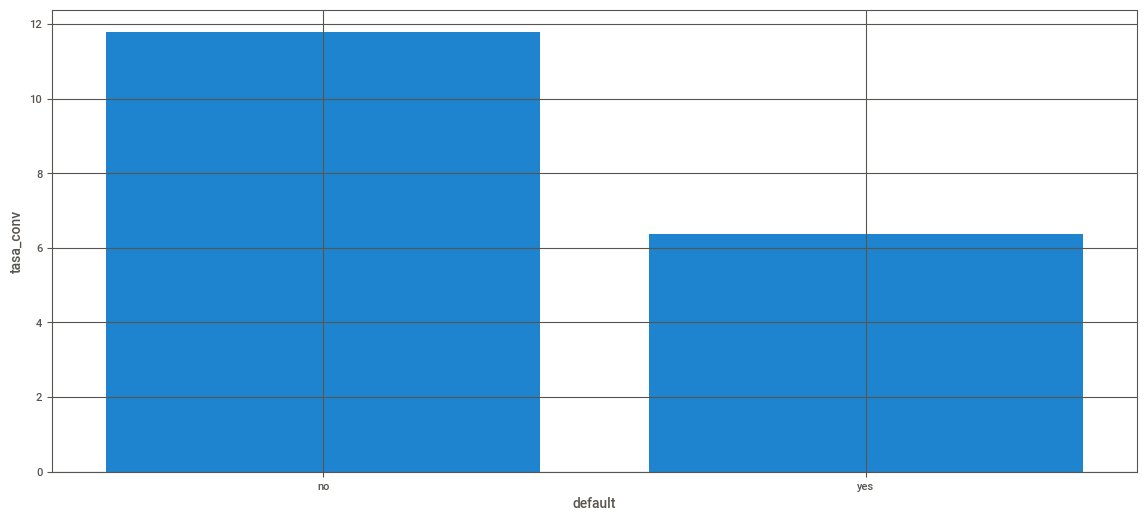

In [23]:
tasa_conversion('default','y_bin',type='bar')

En lo que respecta a "default" (si las personas llegan a pagar la deuda que contraen a tiempo), se puede destacar que las personas que contraen una deuda, pero que la acaban pagando, prácticamente doblan a aquellas que la contraen y dejan de pagarla. Por lo que es lógico que la tasa de conversión sea mucho menor en éstas últimas.

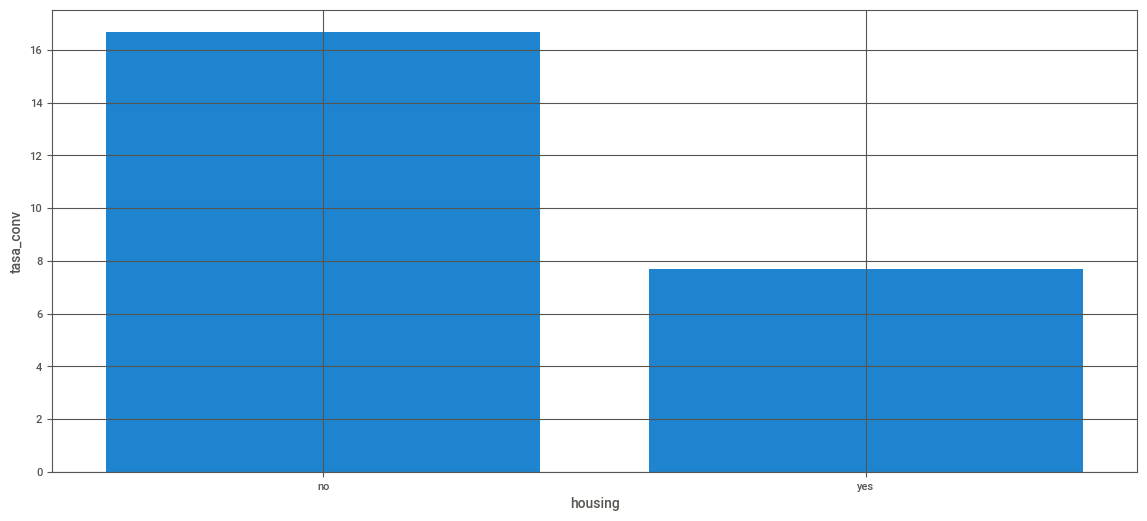

In [24]:
tasa_conversion('housing','y_bin',type='bar')

Lo mismo ocurre con aquellas personas que tienen un préstamo hipotecario. Aquellas que lo contraen tienen una menor tasa de conversión que aquellas que no disponen del mismo. Esto se puede dar ya que tienen unos mayores gastos mensuales (personas con hipoteca) y no pueden, o quieren, endeudarse más.

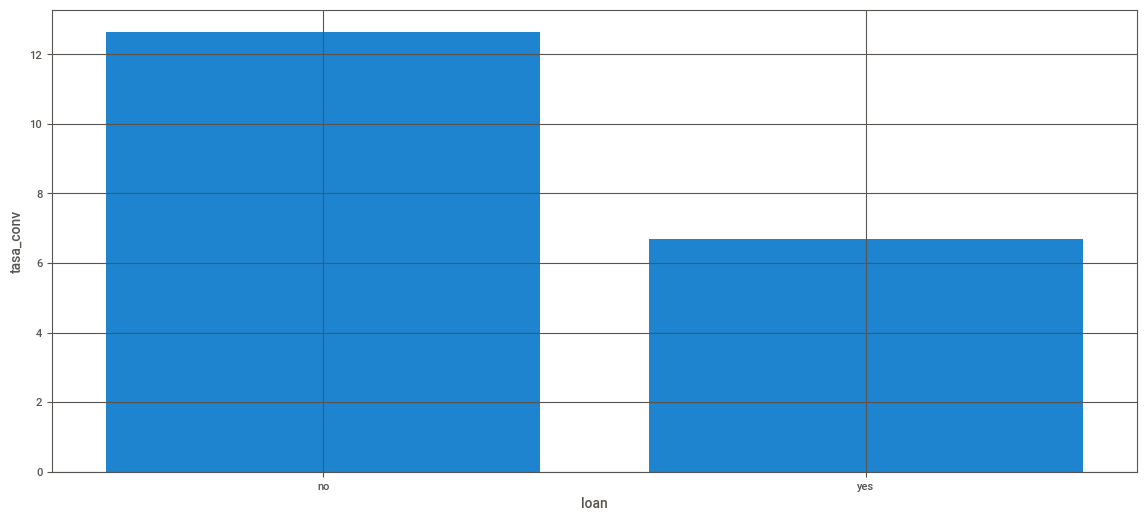

In [25]:
tasa_conversion('loan','y_bin',type='bar')

Siguiendo el símil de las anteriores gráficas, aquellas personas que no tienen un préstamo tienen una tasa de conversión superior a aquellas que sí que lo solicitaron en su momento. Principalmente, por el mismo motivo que en la anterior. Cuando una persona tiene un préstamo, normalmente no quiere tener más gastos a lo largo del mes, por salud financiera.

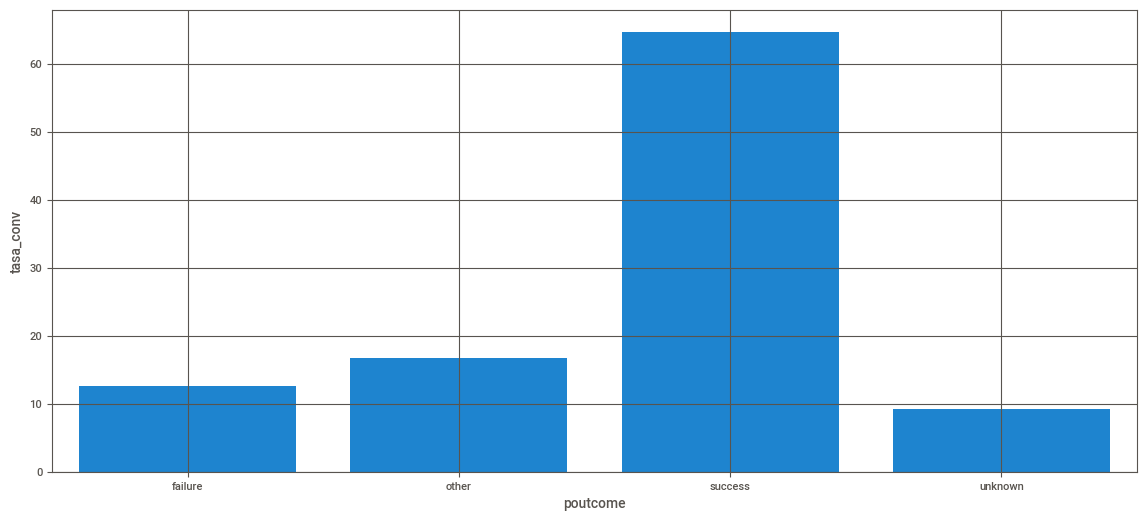

In [26]:
tasa_conversion('poutcome','y_bin',type='bar')

Por último, en la gráfica de "poutcome" (resultado de la campaña de marketing anterior), si el cliente adquirió en su momento el producto/oferta que se le ofreció anteriormente, es muchísimo más probable que adquiera este nuevo producto. (70% de tasa de conversión)

## Análsis Bivariado


El análisis bivariado es un método estadístico que se utiliza para examinar la relación entre dos variables. Se centra en describir y cuantificar la asociación entre estas variables, ya sea que sean cuantitativas o categóricas.

In [27]:
# Tasa de conversión para análisis bivariado.
def graf_tasa_conversion_bivariado(col, order = None):
  tc = data.groupby(col)['y_bin'].mean().to_frame().reset_index()

  # Gráfico resultante:
  plt.figure(figsize = (13,7))
  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Tasa conversión {col[0]} y {col[1]}')
  plt.xlabel('Tasa de conversión (%)')
  plt.xlim((0, 1));


<ipython-input-27-6c9d3fac007d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)


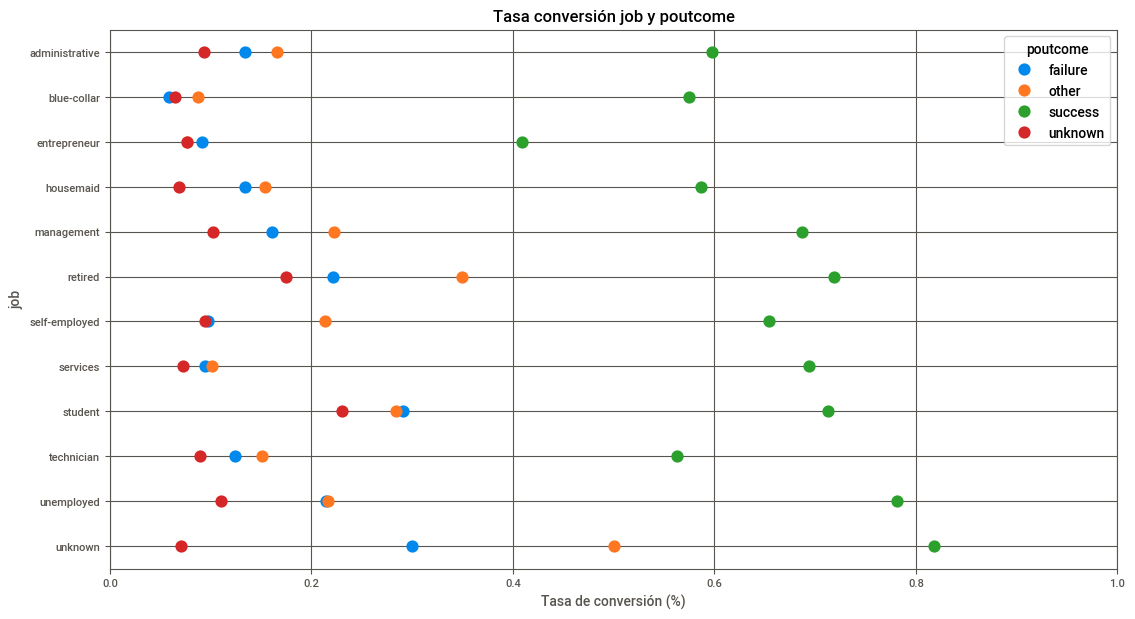

In [28]:
graf_tasa_conversion_bivariado(['job', 'poutcome'])

Una vez observada la gráfica anterior, es interesante conocer qué perfiles sería interesante contactar para poder cerrar un deal:
- **Desempleados**: tienen una tasa cercana al 80% si de nuevo se les contactara para adquirir un nuevo producto.
- **Estudiantes** y **Jubilados**: Tasa superior al 70% de conversión
- **Managers**: Tasa muy cercana al 70%
- **Desconocidos**: No se conoce el oficio al cual están ligados pero sería interesante atacar a esas personas, ya que su tasa de conversión es superior al 80%.

<ipython-input-27-6c9d3fac007d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)


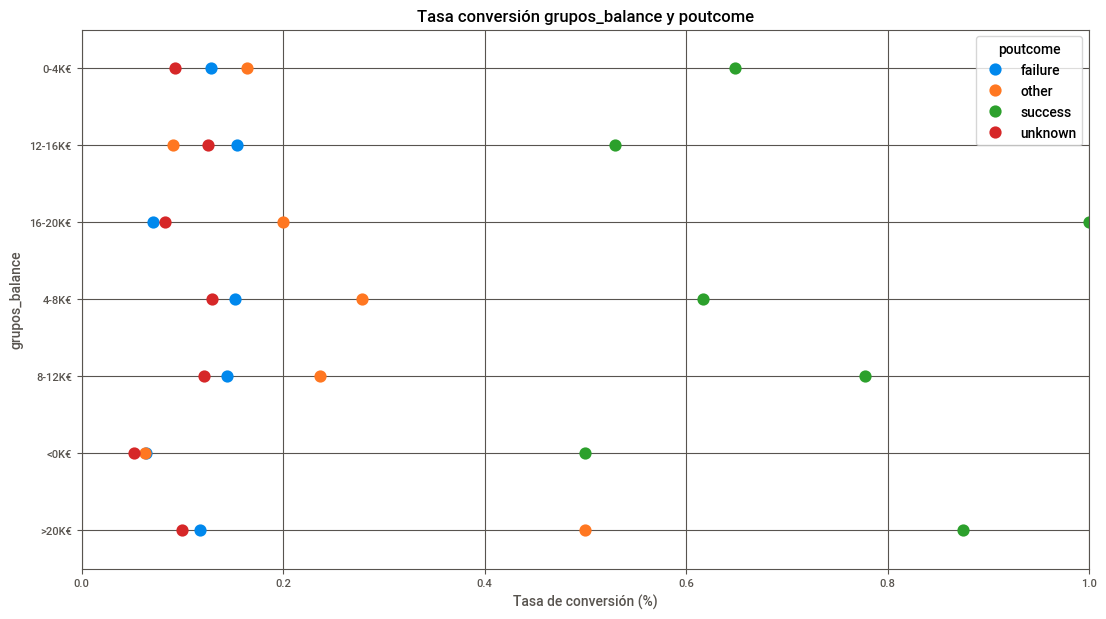

In [29]:
graf_tasa_conversion_bivariado(['grupos_balance', 'poutcome'])

Se puede destacar de la gráfica anterior que:
- Aquellos con un saldo **superior a 20.000€** tienen una Tasa de conversión cercana al 90%.
- Aquellos que se encuentran entre los **8.000€** y los **12.000€** tienen una tasa cercana al 80%.


<ipython-input-27-6c9d3fac007d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)


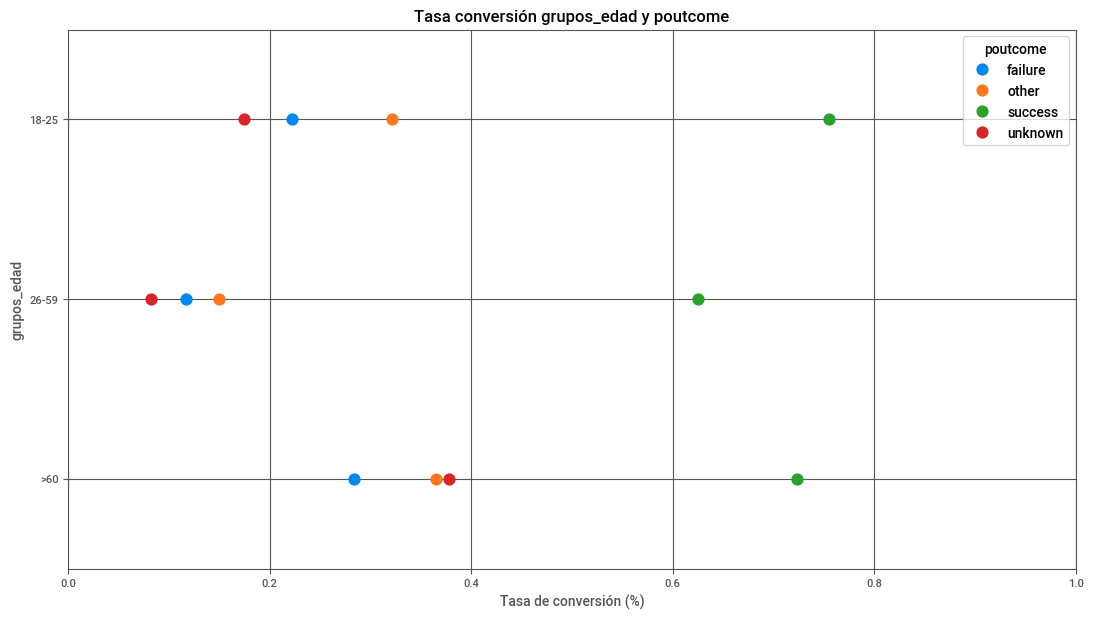

In [30]:
graf_tasa_conversion_bivariado(['grupos_edad', 'poutcome'])

Como ya se vió en el análisis univariado, sería muy interesante atacar al grupo de edad de los **jóvenes** así como al de **mayores** ya que son los que mayor tasa de conversión concentran (>70%).


<ipython-input-27-6c9d3fac007d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)


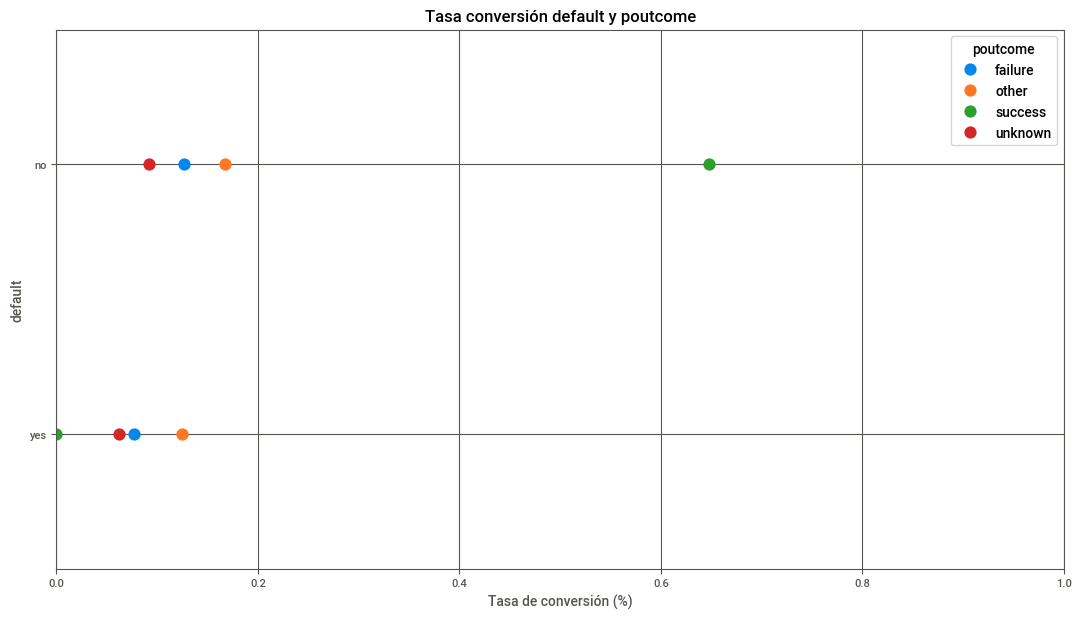

In [31]:
graf_tasa_conversion_bivariado(['default', 'poutcome'])

<ipython-input-27-6c9d3fac007d>:7: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x = tc['y_bin'], y = tc[col[0]], hue = tc[col[1]], join = False)


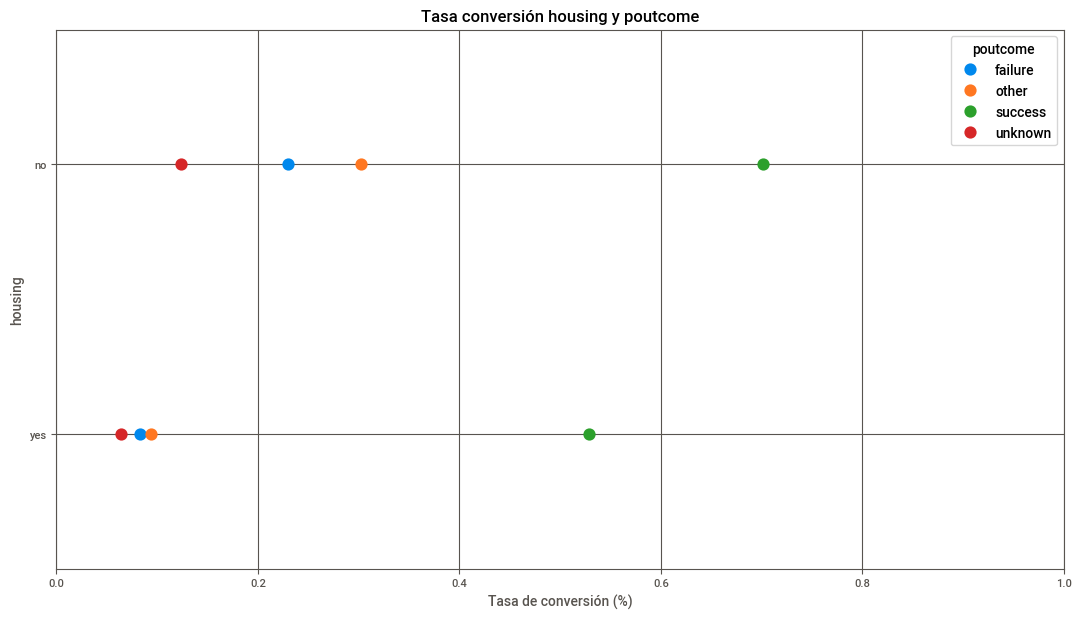

In [32]:
graf_tasa_conversion_bivariado(['housing', 'poutcome'])

Teniendo en cuenta ambos gráficos, reportan mucha información acerca del perfil idóneo:
- Las personas que sí que hacen frente a sus deudas (default), tienen una tasa de conversión cercana al 65%, mientras que aquellas que tienen impagos, se hunde hasta el 0%. No convierte ninguno.

- Las personas que **no** disponen de una hipoteca, su tasa de conversión se encuentra muy cercana al 70%, mientras que aquellas que mes a mes tienen que hacer frente al pago de la misma, convierten, pero con una menor tasa. Aproximadamente un 55%.

# Conclusiones

Como en un principio se comentó, para el análsis EDA, se  probó a utilizar Sweetviz. Es una herramienta muy interesante que ayuda con el análsis EDA, pero el tratamiento de datos no es el esperado y se ha preferido hacer de manera manual todos los graficos pertinentes.

Una vez realizada la limpieza del dataset, así como el análisis/estudio de las variables más importantes que se encuentran en el mismo, se podría definir, a priori, un perfil "idóneo" para el potencial cliente.

La edad de la persona contactada debería encontrarse principalmente en el grupo de edades de 18 a 25 años. Es verdad que personas mayores (>60 años) es un buen atractivo.

Además, la educación del mismo es interesante, puesto que a mayor nivel de estudios, normalmente se correlaciona con un mayor balance en su cuenta del banco. Para ello, el grupo más interesante sería aquel que se encuentra entre los 16.000€ y 20.000€ puesto que son aquellos que mayor tasa de conversión poseen. También podemos relacionar con ello el perfil laboral que estos tienen. Los grupos más importantes, cuya tasa de conversión era alta eran: Desempleados, Jubilados y, por último, estudiantes. Sí que es verdad que existen 12 diferentes categorías laborales, pero estas anteriores son las más interesantes.

Es muy importante que las personas contactadas no se encuentren sumergidos en una deuda, ya sea un crédito personal o una hipoteca. Además, si estos se encuentran en esta situación, se deberá comprobar si hacen frente a los pagos a su debido tiempo.

Uno de los requisitos más importantes y que es imprescindible es la variable "poutcome", es decir, que estas personas hayan sido previamente contactadas por el banco y de ser así que el resultado hubiera sido "success", que significa que aceptaron en su momento la oferta.